# NEWYORK HOUSING DATASET

In [1]:
# importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# EDA

In [3]:
#Load the dataset into a pandas dataframe
df = pd.read_csv('D:/DML PROJECT DATASET/HouseDataset/nyc-rolling-sales.csv')

In [4]:
#checking the number of rows and column
df.shape

(84548, 22)

In [5]:
# print first 5 rows 
df.head()

Id  BOROUGH   NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
0   4        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
1   5        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
2   6        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
3   7        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
4   8        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                

  TAX CLASS AT PRESENT  BLOCK  LOT EASE-MENT BUILDING CLASS AT PRESENT  \
0                   2A    392    6                                  C2   
1                    2    399   26                                  C7   
2                    2    399   39                                  C7   
3                   2B    402   21                                  C4   
4                   2A    404   55                                  C2   

                  ADDRESS  ... RESIDENTIAL UNITS  COMMERCIAL UNITS  \
0            153 AVENUE B  ...                 5                 0   
1   234 EAST 4TH   STREET  ...                28                 3   
2   197 EAST 3RD   STREET  ...                16                 1   
3     154 EAST 7TH STREET  ...                10                 0   
4  301 EAST 10TH   STREET  ...                 6                 0   

   TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET YEAR BUILT  \
0            5              1633               6440       1900   
1           31              4616              18690       1900   
2           17              2212               7803       1900   
3           10              2272               6794       1913   
4            6              2369               4615       1900   

  TAX CLASS AT TIME OF SALE  BUILDING CLASS AT TIME OF SALE  SALE PRICE  \
0                         2                              C2     6625000   
1                         2                              C7         -     
2                         2                              C7         -     
3                         2                              C4     3936272   
4                         2                              C2     8000000   

         SALE DATE  
0   7/19/2017 0:00  
1  12/14/2016 0:00  
2   12/9/2016 0:00  
3   9/23/2016 0:00  
4  11/17/2016 0:00  

[5 rows x 22 columns]

In [6]:
#getting information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Id                              84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [7]:
df.shape

(84548, 22)

In [8]:
# create function to check the number of null value in the dataset
def check_null(a):
    print(a.isnull().sum().sort_values(ascending=False))
    
check_null(df)

Id                                0
BOROUGH                           0
SALE PRICE                        0
BUILDING CLASS AT TIME OF SALE    0
TAX CLASS AT TIME OF SALE         0
YEAR BUILT                        0
GROSS SQUARE FEET                 0
LAND SQUARE FEET                  0
TOTAL UNITS                       0
COMMERCIAL UNITS                  0
RESIDENTIAL UNITS                 0
ZIP CODE                          0
APARTMENT NUMBER                  0
ADDRESS                           0
BUILDING CLASS AT PRESENT         0
EASE-MENT                         0
LOT                               0
BLOCK                             0
TAX CLASS AT PRESENT              0
BUILDING CLASS CATEGORY           0
NEIGHBORHOOD                      0
SALE DATE                         0
dtype: int64


# there are no null value in the dataset

In [9]:
# calculating the basic stats
df.describe()

Id       BOROUGH         BLOCK           LOT      ZIP CODE  \
count  84548.000000  84548.000000  84548.000000  84548.000000  84548.000000   
mean   10344.359878      2.998758   4237.218976    376.224015  10731.991614   
std     7151.779436      1.289790   3568.263407    658.136814   1290.879147   
min        4.000000      1.000000      1.000000      1.000000      0.000000   
25%     4231.000000      2.000000   1322.750000     22.000000  10305.000000   
50%     8942.000000      3.000000   3311.000000     50.000000  11209.000000   
75%    15987.250000      4.000000   6281.000000   1001.000000  11357.000000   
max    26739.000000      5.000000  16322.000000   9106.000000  11694.000000   

       RESIDENTIAL UNITS  COMMERCIAL UNITS   TOTAL UNITS    YEAR BUILT  \
count       84548.000000      84548.000000  84548.000000  84548.000000   
mean            2.025264          0.193559      2.249184   1789.322976   
std            16.721037          8.713183     18.972584    537.344993   
min             0.000000          0.000000      0.000000      0.000000   
25%             0.000000          0.000000      1.000000   1920.000000   
50%             1.000000          0.000000      1.000000   1940.000000   
75%             2.000000          0.000000      2.000000   1965.000000   
max          1844.000000       2261.000000   2261.000000   2017.000000   

       TAX CLASS AT TIME OF SALE  
count               84548.000000  
mean                    1.657485  
std                     0.819341  
min                     1.000000  
25%                     1.000000  
50%                     2.000000  
75%                     2.000000  
max                     4.000000

In [10]:
# seperating (object or boolean) and (int or float value)
qulitative_cols = []
quantitative_cols = []
for x in df.columns:
    if df[x].dtype =='object' or df[x].dtype=='bool':
        qulitative_cols.append(x)
    elif df[x].dtype =='int64' or df[x].dtype=='float64':
        quantitative_cols.append(x)
print(qulitative_cols)
print(quantitative_cols)

['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE']
['Id', 'BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE']


# Data Prepocessing

In [12]:
# checking the number of null value in total_bedrooms
df = df.dropna()

In [13]:
#dropping column that are not required
df.drop(columns=['Id','BLOCK','LOT','ZIP CODE','NEIGHBORHOOD','BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','EASE-MENT','BUILDING CLASS AT PRESENT','ADDRESS','APARTMENT NUMBER','ZIP CODE','TAX CLASS AT TIME OF SALE','BUILDING CLASS AT TIME OF SALE'], inplace=True)

In [14]:
#Print the dataset
df

BOROUGH  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  \
0            1                  5                 0            5   
1            1                 28                 3           31   
2            1                 16                 1           17   
3            1                 10                 0           10   
4            1                  6                 0            6   
...        ...                ...               ...          ...   
84543        5                  2                 0            2   
84544        5                  2                 0            2   
84545        5                  2                 0            2   
84546        5                  0                 7            7   
84547        5                  0                 1            1   

      LAND SQUARE FEET GROSS SQUARE FEET  YEAR BUILT SALE PRICE  \
0                 1633              6440        1900    6625000   
1                 4616             18690        1900        -     
2                 2212              7803        1900        -     
3                 2272              6794        1913    3936272   
4                 2369              4615        1900    8000000   
...                ...               ...         ...        ...   
84543             2400              2575        1998     450000   
84544             2498              2377        1998     550000   
84545             4000              1496        1925     460000   
84546           208033             64117        2001   11693337   
84547            10796              2400        2006      69300   

             SALE DATE  
0       7/19/2017 0:00  
1      12/14/2016 0:00  
2       12/9/2016 0:00  
3       9/23/2016 0:00  
4      11/17/2016 0:00  
...                ...  
84543  11/28/2016 0:00  
84544   4/21/2017 0:00  
84545    7/5/2017 0:00  
84546  12/21/2016 0:00  
84547  10/27/2016 0:00  

[84548 rows x 9 columns]

In [15]:
# the column 'BOROUGH'is a digital code for the borough the property is located in;
# in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
# Define a dictionary that maps the digit code to the borough name
borough = {1: "Manhattan", 2: "Bronx", 3: "Brooklyn", 4: "Queens", 5: "Staten Island"}

# Using the map() to apply the borough dictionary to the BOROUGH column
df["BOROUGH"] = df["BOROUGH"].map(borough)

In [16]:
# print the borough value
df["BOROUGH"]

0            Manhattan
1            Manhattan
2            Manhattan
3            Manhattan
4            Manhattan
             ...      
84543    Staten Island
84544    Staten Island
84545    Staten Island
84546    Staten Island
84547    Staten Island
Name: BOROUGH, Length: 84548, dtype: object

In [17]:
#print the dataset
df

BOROUGH  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  \
0          Manhattan                  5                 0            5   
1          Manhattan                 28                 3           31   
2          Manhattan                 16                 1           17   
3          Manhattan                 10                 0           10   
4          Manhattan                  6                 0            6   
...              ...                ...               ...          ...   
84543  Staten Island                  2                 0            2   
84544  Staten Island                  2                 0            2   
84545  Staten Island                  2                 0            2   
84546  Staten Island                  0                 7            7   
84547  Staten Island                  0                 1            1   

      LAND SQUARE FEET GROSS SQUARE FEET  YEAR BUILT SALE PRICE  \
0                 1633              6440        1900    6625000   
1                 4616             18690        1900        -     
2                 2212              7803        1900        -     
3                 2272              6794        1913    3936272   
4                 2369              4615        1900    8000000   
...                ...               ...         ...        ...   
84543             2400              2575        1998     450000   
84544             2498              2377        1998     550000   
84545             4000              1496        1925     460000   
84546           208033             64117        2001   11693337   
84547            10796              2400        2006      69300   

             SALE DATE  
0       7/19/2017 0:00  
1      12/14/2016 0:00  
2       12/9/2016 0:00  
3       9/23/2016 0:00  
4      11/17/2016 0:00  
...                ...  
84543  11/28/2016 0:00  
84544   4/21/2017 0:00  
84545    7/5/2017 0:00  
84546  12/21/2016 0:00  
84547  10/27/2016 0:00  

[84548 rows x 9 columns]

In [18]:
# Replace '-' values with null values
df.replace(' -  ', np.nan, inplace=True)

# Drop null values from the dataset
df.dropna(inplace=True)

In [19]:
# print the dataset
df

BOROUGH  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  \
0          Manhattan                  5                 0            5   
3          Manhattan                 10                 0           10   
4          Manhattan                  6                 0            6   
6          Manhattan                  8                 0            8   
9          Manhattan                 24                 0           24   
...              ...                ...               ...          ...   
84543  Staten Island                  2                 0            2   
84544  Staten Island                  2                 0            2   
84545  Staten Island                  2                 0            2   
84546  Staten Island                  0                 7            7   
84547  Staten Island                  0                 1            1   

      LAND SQUARE FEET GROSS SQUARE FEET  YEAR BUILT SALE PRICE  \
0                 1633              6440        1900    6625000   
3                 2272              6794        1913    3936272   
4                 2369              4615        1900    8000000   
6                 1750              4226        1920    3192840   
9                 4489             18523        1920   16232000   
...                ...               ...         ...        ...   
84543             2400              2575        1998     450000   
84544             2498              2377        1998     550000   
84545             4000              1496        1925     460000   
84546           208033             64117        2001   11693337   
84547            10796              2400        2006      69300   

             SALE DATE  
0       7/19/2017 0:00  
3       9/23/2016 0:00  
4      11/17/2016 0:00  
6       9/23/2016 0:00  
9       11/7/2016 0:00  
...                ...  
84543  11/28/2016 0:00  
84544   4/21/2017 0:00  
84545    7/5/2017 0:00  
84546  12/21/2016 0:00  
84547  10/27/2016 0:00  

[48244 rows x 9 columns]

In [20]:
#converting the sale date column to year
df["SALE DATE"] = pd.to_datetime(df['SALE DATE']).dt.year

In [21]:
# print the dataset
df

BOROUGH  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  \
0          Manhattan                  5                 0            5   
3          Manhattan                 10                 0           10   
4          Manhattan                  6                 0            6   
6          Manhattan                  8                 0            8   
9          Manhattan                 24                 0           24   
...              ...                ...               ...          ...   
84543  Staten Island                  2                 0            2   
84544  Staten Island                  2                 0            2   
84545  Staten Island                  2                 0            2   
84546  Staten Island                  0                 7            7   
84547  Staten Island                  0                 1            1   

      LAND SQUARE FEET GROSS SQUARE FEET  YEAR BUILT SALE PRICE  SALE DATE  
0                 1633              6440        1900    6625000       2017  
3                 2272              6794        1913    3936272       2016  
4                 2369              4615        1900    8000000       2016  
6                 1750              4226        1920    3192840       2016  
9                 4489             18523        1920   16232000       2016  
...                ...               ...         ...        ...        ...  
84543             2400              2575        1998     450000       2016  
84544             2498              2377        1998     550000       2017  
84545             4000              1496        1925     460000       2017  
84546           208033             64117        2001   11693337       2016  
84547            10796              2400        2006      69300       2016  

[48244 rows x 9 columns]

In [22]:
# Count the number of properties in each borough
borough_count = df['BOROUGH'].value_counts()
borough_count

Brooklyn         24047
Queens           11078
Bronx             7049
Staten Island     5064
Manhattan         1006
Name: BOROUGH, dtype: int64

# We can notice that more than 70 % of properties lies in Brooklyn and queens

# Data Visualization

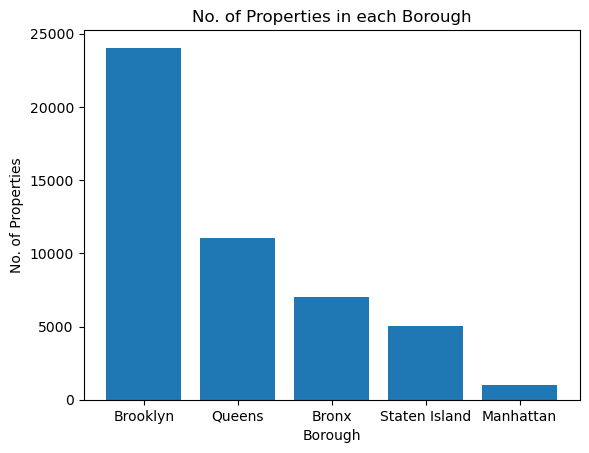

In [23]:
# Create a bar chart
plt.bar(borough_count.index, borough_count.values)

# Add axis labels and title
plt.xlabel('Borough')
plt.ylabel('No. of Properties')
plt.title('No. of Properties in each Borough')

# Display the plot
plt.show()

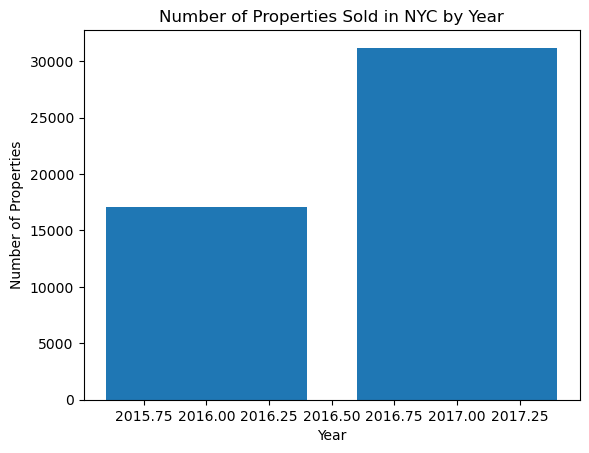

In [24]:
# Group the data by year and count the number of properties
property_count = df.groupby('SALE DATE')['BOROUGH'].count()

# Create a bar chart of the property count by year
plt.bar(property_count.index, property_count.values)
plt.xlabel('Year')
plt.ylabel('Number of Properties')
plt.title('Number of Properties Sold in NYC by Year')
plt.show()

# the number of properties sold in 2017 is almost twice than in 2016

In [25]:
# Count the number of residential units
residential_count = df['RESIDENTIAL UNITS'].value_counts()
print('Residential Units Count:\n', residential_count)

# Count the number of commercial units
commercial_count = df['COMMERCIAL UNITS'].value_counts()
print('\nCommercial Units Count:\n', commercial_count)

# Count the number of total units
total_count = df['TOTAL UNITS'].value_counts()
print('\nTotal Units Count:\n', total_count)

Residential Units Count:
 1      19712
2      13199
0       7994
3       3837
4       1166
       ...  
222        1
99         1
130        1
462        1
128        1
Name: RESIDENTIAL UNITS, Length: 157, dtype: int64

Commercial Units Count:
 0       44222
1        2831
2         636
3         191
4         114
5          62
6          50
8          23
7          19
9          16
12         11
10          9
11          8
15          6
14          4
17          4
35          3
20          3
126         2
13          2
22          2
436         2
26          2
25          2
19          2
184         1
16          1
172         1
51          1
18          1
21          1
2261        1
55          1
147         1
28          1
42          1
62          1
59          1
254         1
318         1
52          1
23          1
32          1
Name: COMMERCIAL UNITS, dtype: int64

Total Units Count:
 1      21431
2      13082
0       5181
3       4505
4       1283
       ...  
179        1
67 

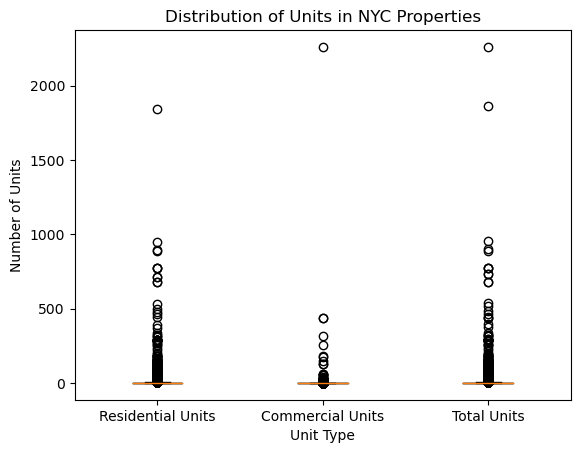

In [26]:

# Create a box plot of the residential, commercial, and total units
unit_data = df[['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS']]
plt.boxplot(unit_data, labels=['Residential Units', 'Commercial Units', 'Total Units'])
plt.xlabel('Unit Type')
plt.ylabel('Number of Units')
plt.title('Distribution of Units in NYC Properties')
plt.show()


In [27]:
# correlation matrix
df.corr()

RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  \
RESIDENTIAL UNITS           1.000000          0.012775     0.848305   
COMMERCIAL UNITS            0.012775          1.000000     0.540251   
TOTAL UNITS                 0.848305          0.540251     1.000000   
YEAR BUILT                  0.027207          0.005444     0.025181   
SALE DATE                  -0.012925         -0.007404    -0.014944   

                   YEAR BUILT  SALE DATE  
RESIDENTIAL UNITS    0.027207  -0.012925  
COMMERCIAL UNITS     0.005444  -0.007404  
TOTAL UNITS          0.025181  -0.014944  
YEAR BUILT           1.000000  -0.032581  
SALE DATE           -0.032581   1.000000

# correlation matrix shows there are no relation between the land square feet and gross square feet variables with the other variables in the dataset

<AxesSubplot:>

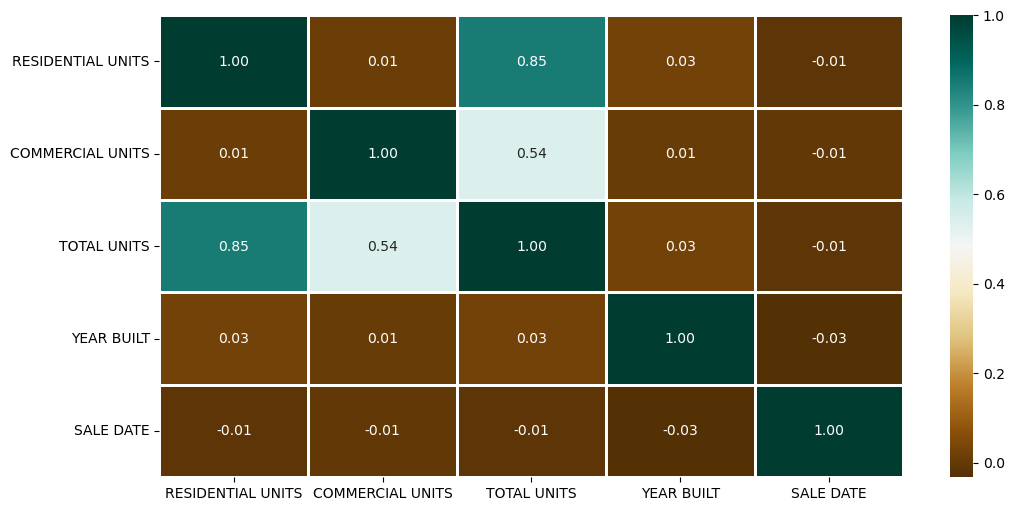

In [28]:
# plotting a heatmap 
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)


# Feature Selection and Engineering

In [29]:
# selecting 'LAND SQUARE FEET', 'GROSS SQUARE FEET' that may have impact on the sale price
X = df[['LAND SQUARE FEET', 'GROSS SQUARE FEET']]
y = df['SALE PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model performance on the testing set
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print('R^2 score for Linear Regression is:', r2)
print('Mean squared error for Linear Regression is:', mse)
print('Root mean squared error for Linear Regression is:', rmse)

R^2 score for Linear Regression is: -0.1646553698564428
Mean squared error for Linear Regression is: 33355926967724.996
Root mean squared error for Linear Regression is: 5775459.026581783


# Got Negative score ,so this features is not suitable for our model.Try building our model with other features.

In [30]:
# checking with the units
X = df[['TOTAL UNITS', 'COMMERCIAL UNITS','RESIDENTIAL UNITS']]
y = df['SALE PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model performance on the testing set
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print('R^2 score for Linear Regression is:', r2)
print('Mean squared error for Linear Regression is:', mse)
print('Root mean squared error for Linear Regression is:', rmse)

R^2 score for Linear Regression is: -8.10654826100167
Mean squared error for Linear Regression is: 260813083924969.44
Root mean squared error for Linear Regression is: 16149708.478018092


# The feature selection even got worse.

In [31]:
# Train a Random Forest regression model on the training set
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Evaluate the model performance on the testing set
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print('R^2 score for Random Forest Regression is :', r2)
print('Mean squared error for Random Forest Regression is :', mse)
print('Root mean squared error for Random Forest Regression is :', rmse)

R^2 score for Random Forest Regression is : -0.29346017844578776
Mean squared error for Random Forest Regression is : 37044918492254.33
Root mean squared error for Random Forest Regression is : 6086453.687678427


In [32]:
df

BOROUGH  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  \
0          Manhattan                  5                 0            5   
3          Manhattan                 10                 0           10   
4          Manhattan                  6                 0            6   
6          Manhattan                  8                 0            8   
9          Manhattan                 24                 0           24   
...              ...                ...               ...          ...   
84543  Staten Island                  2                 0            2   
84544  Staten Island                  2                 0            2   
84545  Staten Island                  2                 0            2   
84546  Staten Island                  0                 7            7   
84547  Staten Island                  0                 1            1   

      LAND SQUARE FEET GROSS SQUARE FEET  YEAR BUILT SALE PRICE  SALE DATE  
0                 1633              6440        1900    6625000       2017  
3                 2272              6794        1913    3936272       2016  
4                 2369              4615        1900    8000000       2016  
6                 1750              4226        1920    3192840       2016  
9                 4489             18523        1920   16232000       2016  
...                ...               ...         ...        ...        ...  
84543             2400              2575        1998     450000       2016  
84544             2498              2377        1998     550000       2017  
84545             4000              1496        1925     460000       2017  
84546           208033             64117        2001   11693337       2016  
84547            10796              2400        2006      69300       2016  

[48244 rows x 9 columns]

In [33]:
# Perform one-hot encoding on the 'BOROUGH' column
df = pd.get_dummies(df, columns=['BOROUGH'])

# Display the encoded data
print(df.head())

   RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS LAND SQUARE FEET  \
0                  5                 0            5             1633   
3                 10                 0           10             2272   
4                  6                 0            6             2369   
6                  8                 0            8             1750   
9                 24                 0           24             4489   

  GROSS SQUARE FEET  YEAR BUILT SALE PRICE  SALE DATE  BOROUGH_Bronx  \
0              6440        1900    6625000       2017              0   
3              6794        1913    3936272       2016              0   
4              4615        1900    8000000       2016              0   
6              4226        1920    3192840       2016              0   
9             18523        1920   16232000       2016              0   

   BOROUGH_Brooklyn  BOROUGH_Manhattan  BOROUGH_Queens  BOROUGH_Staten Island  
0                 0                  1               0

In [34]:
df

RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS LAND SQUARE FEET  \
0                      5                 0            5             1633   
3                     10                 0           10             2272   
4                      6                 0            6             2369   
6                      8                 0            8             1750   
9                     24                 0           24             4489   
...                  ...               ...          ...              ...   
84543                  2                 0            2             2400   
84544                  2                 0            2             2498   
84545                  2                 0            2             4000   
84546                  0                 7            7           208033   
84547                  0                 1            1            10796   

      GROSS SQUARE FEET  YEAR BUILT SALE PRICE  SALE DATE  BOROUGH_Bronx  \
0                  6440        1900    6625000       2017              0   
3                  6794        1913    3936272       2016              0   
4                  4615        1900    8000000       2016              0   
6                  4226        1920    3192840       2016              0   
9                 18523        1920   16232000       2016              0   
...                 ...         ...        ...        ...            ...   
84543              2575        1998     450000       2016              0   
84544              2377        1998     550000       2017              0   
84545              1496        1925     460000       2017              0   
84546             64117        2001   11693337       2016              0   
84547              2400        2006      69300       2016              0   

       BOROUGH_Brooklyn  BOROUGH_Manhattan  BOROUGH_Queens  \
0                     0                  1               0   
3                     0                  1               0   
4                     0                  1               0   
6                     0                  1               0   
9                     0                  1               0   
...                 ...                ...             ...   
84543                 0                  0               0   
84544                 0                  0               0   
84545                 0                  0               0   
84546                 0                  0               0   
84547                 0                  0               0   

       BOROUGH_Staten Island  
0                          0  
3                          0  
4                          0  
6                          0  
9                          0  
...                      ...  
84543                      1  
84544                      1  
84545                      1  
84546                      1  
84547                      1  

[48244 rows x 13 columns]

In [35]:
# importing minmax scaler 
from sklearn.preprocessing import MinMaxScaler


# Scale the LAND SQUARE FEET and GROSS SQUARE FEET columns using MinMaxScaler
scaler = MinMaxScaler()
df[['LAND SQUARE FEET', 'GROSS SQUARE FEET']] = scaler.fit_transform(df[['LAND SQUARE FEET', 'GROSS SQUARE FEET']])

# Check the new scaled values
print(df[['LAND SQUARE FEET', 'GROSS SQUARE FEET']].head())

   LAND SQUARE FEET  GROSS SQUARE FEET
0          0.000386           0.001717
3          0.000537           0.001811
4          0.000560           0.001230
6          0.000414           0.001127
9          0.001062           0.004939


# the value of LAND SQUARE FEET is very small compared to the minimum value of LAND SQUARE FEET in the original data. Similarly, the value of GROSS SQUARE FEET is larger than the minimum value but still smaller than the maximum value in the original data.

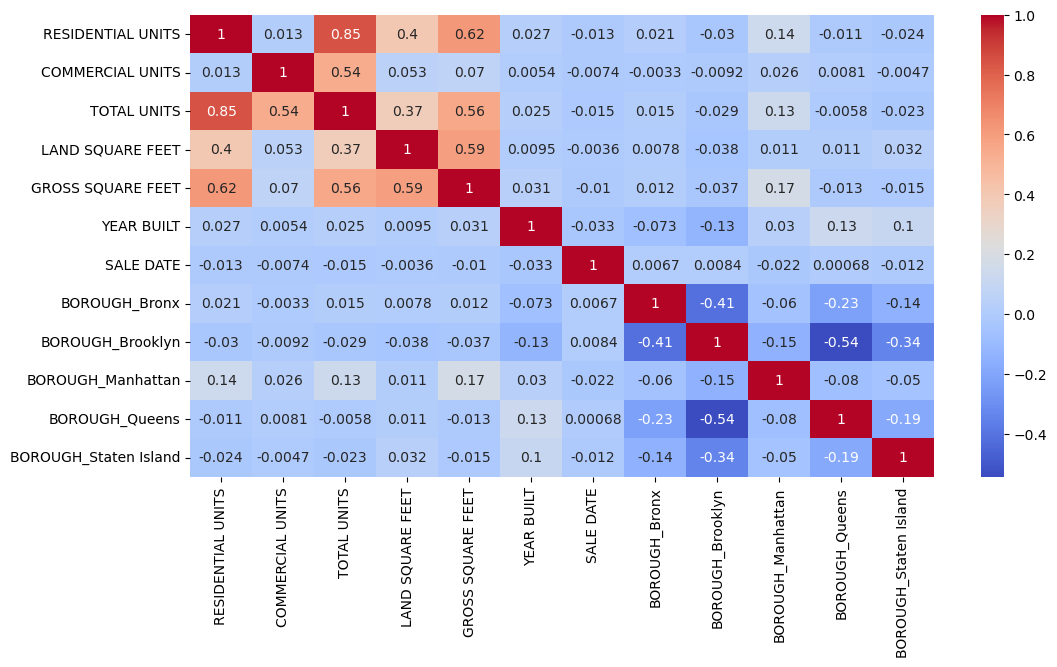

In [36]:
# Select the relevant columns
cols = ['BOROUGH_Bronx','BOROUGH_Brooklyn','BOROUGH_Manhattan','BOROUGH_Queens','BOROUGH_Staten Island', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE']
nyc_data = df[cols]

# Compute the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',)
plt.show()

In [37]:
nyc_data.corr()

BOROUGH_Bronx  BOROUGH_Brooklyn  BOROUGH_Manhattan  \
BOROUGH_Bronx               1.000000         -0.412374          -0.060366   
BOROUGH_Brooklyn           -0.412374          1.000000          -0.145480   
BOROUGH_Manhattan          -0.060366         -0.145480           1.000000   
BOROUGH_Queens             -0.225839         -0.544261          -0.079673   
BOROUGH_Staten Island      -0.141660         -0.341393          -0.049976   
RESIDENTIAL UNITS           0.020608         -0.030303           0.139637   
COMMERCIAL UNITS           -0.003324         -0.009182           0.026474   
TOTAL UNITS                 0.015333         -0.029497           0.131361   
LAND SQUARE FEET            0.007750         -0.037797           0.011169   
GROSS SQUARE FEET           0.011994         -0.037184           0.170747   
YEAR BUILT                 -0.073092         -0.129683           0.029862   

                       BOROUGH_Queens  BOROUGH_Staten Island  \
BOROUGH_Bronx               -0.225839              -0.141660   
BOROUGH_Brooklyn            -0.544261              -0.341393   
BOROUGH_Manhattan           -0.079673              -0.049976   
BOROUGH_Queens               1.000000              -0.186966   
BOROUGH_Staten Island       -0.186966               1.000000   
RESIDENTIAL UNITS           -0.011417              -0.023747   
COMMERCIAL UNITS             0.008139              -0.004701   
TOTAL UNITS                 -0.005817              -0.022809   
LAND SQUARE FEET             0.010973               0.032461   
GROSS SQUARE FEET           -0.012823              -0.015169   
YEAR BUILT                   0.130319               0.103032   

                       RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  \
BOROUGH_Bronx                   0.020608         -0.003324     0.015333   
BOROUGH_Brooklyn               -0.030303         -0.009182    -0.029497   
BOROUGH_Manhattan               0.139637          0.026474     0.131361   
BOROUGH_Queens                 -0.011417          0.008139    -0.005817   
BOROUGH_Staten Island          -0.023747         -0.004701    -0.022809   
RESIDENTIAL UNITS               1.000000          0.012775     0.848305   
COMMERCIAL UNITS                0.012775          1.000000     0.540251   
TOTAL UNITS                     0.848305          0.540251     1.000000   
LAND SQUARE FEET                0.401047          0.052872     0.365453   
GROSS SQUARE FEET               0.618418          0.069502     0.557201   
YEAR BUILT                      0.027207          0.005444     0.025181   

                       LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  
BOROUGH_Bronx                  0.007750           0.011994   -0.073092  
BOROUGH_Brooklyn              -0.037797          -0.037184   -0.129683  
BOROUGH_Manhattan              0.011169           0.170747    0.029862  
BOROUGH_Queens                 0.010973          -0.012823    0.130319  
BOROUGH_Staten Island          0.032461          -0.015169    0.103032  
RESIDENTIAL UNITS              0.401047           0.618418    0.027207  
COMMERCIAL UNITS               0.052872           0.069502    0.005444  
TOTAL UNITS                    0.365453           0.557201    0.025181  
LAND SQUARE FEET               1.000000           0.591357    0.009512  
GROSS SQUARE FEET              0.591357           1.000000    0.031403  
YEAR BUILT                     0.009512           0.031403    1.000000

In [38]:
# Selecting  features
 
features = ['BOROUGH_Brooklyn','BOROUGH_Queens', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(nyc_data[features], nyc_data['SALE PRICE'], test_size=0.2, random_state=42)


In [39]:
from sklearn.decomposition import PCA
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce the number of features
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [40]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_pca)

# Evaluate the model using R-squared
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print('R^2 score for Linear Regression with PCA is:', r2)
print('Mean squared error for Linear Regression  with PCA is:', mse)
print('Root mean squared error for Linear Regression  with PCA is:', rmse)


R^2 score for Linear Regression with PCA is: -0.0002755351964367492
Mean squared error for Linear Regression  with PCA is: 28648060673714.156
Root mean squared error for Linear Regression  with PCA is: 5352388.314922055


In [48]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train)
rf_pred = rf.predict(X_test_pca)
rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = mse ** 0.5


# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_pca, y_train)
dt_pred = dt.predict(X_test_pca)
dt_r2 = r2_score(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = mse ** 0.5

# Lasso
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train_pca, y_train)
lasso_pred = lasso.predict(X_test_pca)
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = mse ** 0.5

# SVR
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train_pca, y_train)
svr_pred = svr.predict(X_test_pca)
svr_r2 = r2_score(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_rmse = mse ** 0.5

print('Random Forest R2 Score with PCA:', rf_r2)
print('Mean squared error for Random Forest Regression  with PCA is:', rf_mse)
print('Root mean squared error for Random Forest Regression  with PCA is:', rf_rmse)
print("\n")

print('Decision Tree R2 Score with PCA:', dt_r2)
print('Mean squared error for Decision tree Regression  with PCA is:', dt_mse)
print('Root mean squared error for Decision tree Regression  with PCA is:', dt_rmse)
print("\n")
print('Lasso R2 Score with PCA:', lasso_r2)
print('Mean squared error for lasso Regression  with PCA is:', lasso_mse)
print('Root mean squared error for lasso Regression  with PCA is:', lasso_rmse)
print("\n")
print('SVR R2 Score with PCA:', svr_r2)
print('Mean squared error for SVR  with PCA is:', svr_mse)
print('Root mean squared error for SVR Regression  with PCA is:', svr_rmse)


Random Forest R2 Score with PCA: -8.922050410460612
Mean squared error for Random Forest Regression  with PCA is: 284169203549204.9
Root mean squared error for Random Forest Regression  with PCA is: 5352388.314922055


Decision Tree R2 Score with PCA: -19.40137017865782
Mean squared error for Decision tree Regression  with PCA is: 584298695849153.4
Root mean squared error for Decision tree Regression  with PCA is: 5352388.314922055


Lasso R2 Score with PCA: -0.00027553458813489584
Mean squared error for lasso Regression  with PCA is: 28648060656292.293
Root mean squared error for lasso Regression  with PCA is: 5352388.314922055


SVR R2 Score with PCA: -0.010984199448198728
Mean squared error for SVR  with PCA is: 28954758630851.203
Root mean squared error for SVR Regression  with PCA is: 5352388.314922055


# Try to fit all the variable in the model

In [42]:
df

RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
0                      5                 0            5          0.000386   
3                     10                 0           10          0.000537   
4                      6                 0            6          0.000560   
6                      8                 0            8          0.000414   
9                     24                 0           24          0.001062   
...                  ...               ...          ...               ...   
84543                  2                 0            2          0.000568   
84544                  2                 0            2          0.000591   
84545                  2                 0            2          0.000946   
84546                  0                 7            7          0.049200   
84547                  0                 1            1          0.002553   

       GROSS SQUARE FEET  YEAR BUILT SALE PRICE  SALE DATE  BOROUGH_Bronx  \
0               0.001717        1900    6625000       2017              0   
3               0.001811        1913    3936272       2016              0   
4               0.001230        1900    8000000       2016              0   
6               0.001127        1920    3192840       2016              0   
9               0.004939        1920   16232000       2016              0   
...                  ...         ...        ...        ...            ...   
84543           0.000687        1998     450000       2016              0   
84544           0.000634        1998     550000       2017              0   
84545           0.000399        1925     460000       2017              0   
84546           0.017095        2001   11693337       2016              0   
84547           0.000640        2006      69300       2016              0   

       BOROUGH_Brooklyn  BOROUGH_Manhattan  BOROUGH_Queens  \
0                     0                  1               0   
3                     0                  1               0   
4                     0                  1               0   
6                     0                  1               0   
9                     0                  1               0   
...                 ...                ...             ...   
84543                 0                  0               0   
84544                 0                  0               0   
84545                 0                  0               0   
84546                 0                  0               0   
84547                 0                  0               0   

       BOROUGH_Staten Island  
0                          0  
3                          0  
4                          0  
6                          0  
9                          0  
...                      ...  
84543                      1  
84544                      1  
84545                      1  
84546                      1  
84547                      1  

[48244 rows x 13 columns]

In [43]:
# checking (object or boolean) and (int or float value)
qulitative_cols = []
quantitative_cols = []
for x in df.columns:
    if df[x].dtype =='object' or df[x].dtype=='bool':
        qulitative_cols.append(x)
    elif df[x].dtype =='int64' or df[x].dtype=='float64':
        quantitative_cols.append(x)
print(qulitative_cols)
print(quantitative_cols)

['SALE PRICE']
['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE DATE']


# Column SALE PRICE is object type.so we convert it to float for statsmodel

In [44]:
df["SALE PRICE"] = df['SALE PRICE'].astype('float64')

In [45]:
# importing statsmodel
import statsmodels.api as sm

In [46]:
#fitting the relevant variable with sale price
X_all = df[['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE DATE']]
y_all = df['SALE PRICE']


In [47]:
model_all = sm.OLS(y_all, X_all).fit()

# Print the model summary
print(model_all.summary())



                                 OLS Regression Results                                
Dep. Variable:             SALE PRICE   R-squared (uncentered):                   0.327
Model:                            OLS   Adj. R-squared (uncentered):              0.327
Method:                 Least Squares   F-statistic:                              3350.
Date:                Wed, 26 Apr 2023   Prob (F-statistic):                        0.00
Time:                        15:50:28   Log-Likelihood:                     -8.5080e+05
No. Observations:               48244   AIC:                                  1.702e+06
Df Residuals:                   48237   BIC:                                  1.702e+06
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------